In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

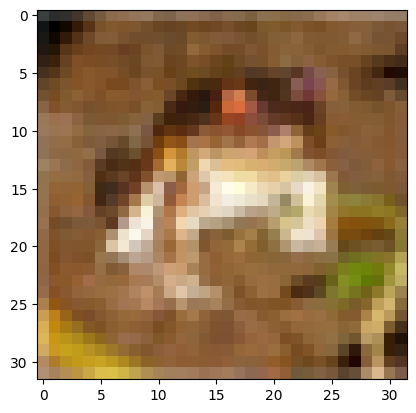

In [6]:
# FROG
plt.imshow(x_train[0])

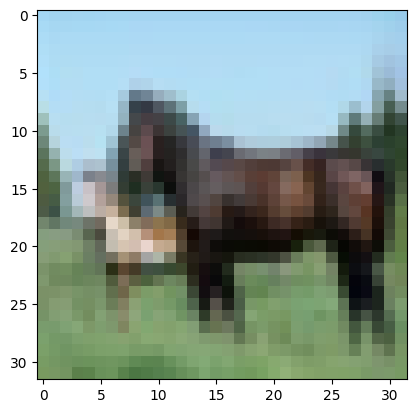

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

np.uint8(255)

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3690 - loss: 1.7494 - val_accuracy: 0.4951 - val_loss: 1.4342
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5788 - loss: 1.2047 - val_accuracy: 0.6143 - val_loss: 1.0930
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6435 - loss: 1.0244 - val_accuracy: 0.5834 - val_loss: 1.1943
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6853 - loss: 0.9091 - val_accuracy: 0.6099 - val_loss: 1.1180
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7144 - loss: 0.8258 - val_accuracy: 0.6470 - val_loss: 1.0689
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7441 - loss: 0.7462 - val_accuracy: 0.6603 - val_loss: 1.0123
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7636 - loss: 0.6954 - val_accuracy: 0.6716 - val_loss: 1.0285
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7807 - loss: 0.6444 - 

In [28]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.45566,1.524798,0.4951,1.434160
1,0.59276,1.167233,0.6143,1.093005
2,0.64788,1.018485,0.5834,1.194316
3,0.68432,0.914770,0.6099,1.117980
4,0.71536,0.831025,0.6470,1.068945


<Axes: >

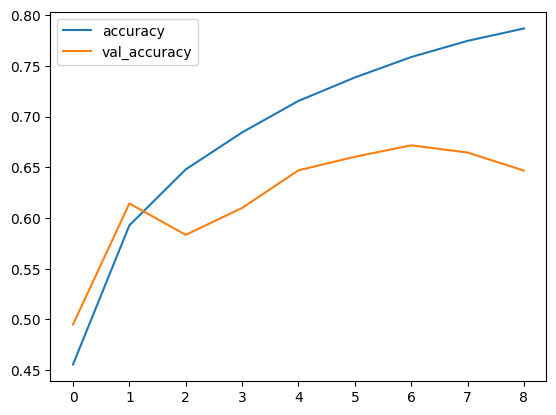

In [31]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

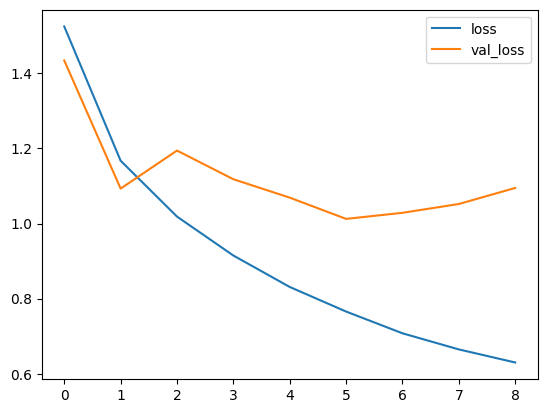

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'compile_metrics']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[1.0946933031082153, 0.6467000246047974]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1000
           1       0.77      0.81      0.79      1000
           2       0.67      0.44      0.53      1000
           3       0.48      0.38      0.42      1000
           4       0.66      0.57      0.61      1000
           5       0.42      0.75      0.54      1000
           6       0.79      0.67      0.72      1000
           7       0.63      0.74      0.68      1000
           8       0.82      0.69      0.75      1000
           9       0.76      0.70      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



In [38]:
confusion_matrix(y_test,predictions)

array([[724,  20,  47,  21,  19,  39,   5,  29,  56,  40],
       [ 18, 809,   5,  15,   6,  35,   9,  15,  26,  62],
       [ 94,  15, 442,  72,  77, 156,  54,  67,  12,  11],
       [ 34,  18,  35, 378,  52, 342,  40,  74,   7,  20],
       [ 27,   8,  40,  67, 567, 141,  36,  97,  12,   5],
       [ 14,   6,  24,  87,  31, 746,  13,  64,   4,  11],
       [ 12,  15,  26,  61,  56, 116, 667,  28,   8,  11],
       [ 13,   6,  16,  30,  41, 137,   2, 742,   2,  11],
       [124,  45,  16,  23,   5,  33,   6,  15, 687,  46],
       [ 34, 110,  10,  27,   2,  33,   9,  51,  19, 705]])

<Axes: >

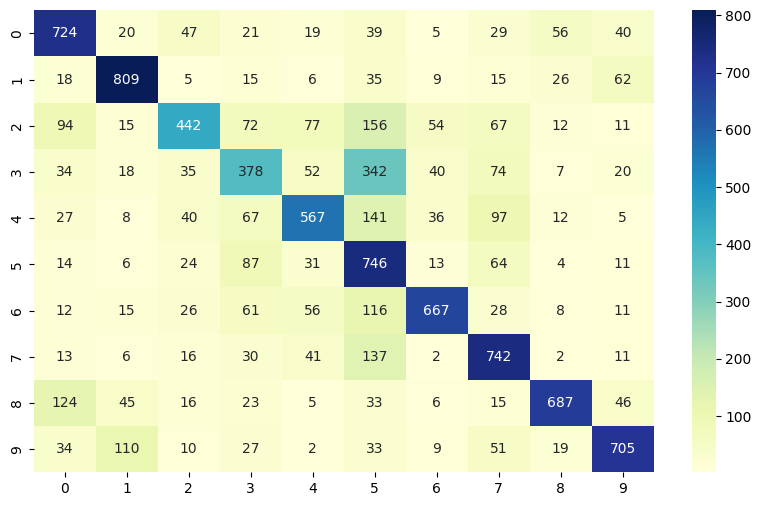

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, fmt='d', cmap='YlGnBu')


# Predicting a given image

In [40]:
my_image = x_test[16]

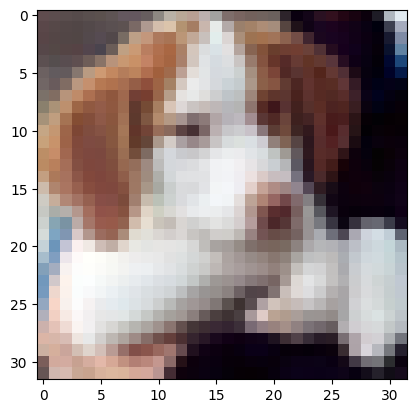

In [41]:
plt.imshow(my_image)

In [45]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[3.3481210e-04, 4.1142884e-03, 1.3180385e-02, 1.8963088e-01,
        3.4064376e-03, 6.2908196e-01, 1.9418331e-03, 1.5755008e-01,
        3.6046820e-04, 3.9883805e-04]], dtype=float32)

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html